In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
path_prefix = './cs5228-2310-final-project/'
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [4]:
df_train.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


## Data Preprocessing

In [5]:
#data clean
df_train.isnull().sum()

rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
dtype: int64

In [6]:
df_train.dtypes

rent_approval_date      object
town                    object
block                   object
street_name             object
flat_type               object
flat_model              object
floor_area_sqm         float64
furnished               object
lease_commence_date      int64
latitude               float64
longitude              float64
elevation              float64
subzone                 object
planning_area           object
region                  object
monthly_rent             int64
dtype: object

In [7]:
df_train.describe()
df_train['rent_approval_date'] = pd.to_datetime(df_train['rent_approval_date'])
df_train['rent_approval_year'] = df_train['rent_approval_date'].dt.year
df_train['rent_approval_month'] = df_train['rent_approval_date'].dt.month/12 + df_train['rent_approval_date'].dt.year

In [8]:
df_train

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,rent_approval_year,rent_approval_month
0,2021-09-01,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,2021,2021.750000
1,2022-05-01,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,2022,2022.416667
2,2022-10-01,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,2022,2022.833333
3,2021-08-01,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,2021,2021.666667
4,2022-11-01,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,2022,2022.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2021-09-01,ang mo kio,441,Ang Mo Kio Avenue 10,3 room,new generation,67.0,yes,1979,1.366050,103.854168,0.0,chong boon,ang mo kio,north-east region,2200,2021,2021.750000
59996,2023-04-01,bukit merah,95a,henderson road,4-room,model a,83.0,yes,2019,1.286493,103.821434,0.0,henderson hill,bukit merah,central region,4100,2023,2023.333333
59997,2022-06-01,tampines,862a,tampines street 83,5-room,improved,122.0,yes,1988,1.355064,103.936507,0.0,tampines west,tampines,east region,2250,2022,2022.500000
59998,2023-01-01,bedok,67,Bedok Sth Avenue 3,5-room,standard,123.0,yes,1977,1.318974,103.944076,0.0,bedok south,bedok,east region,4700,2023,2023.083333


In [9]:
df_train.describe()

,rent_approval_date,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,monthly_rent,rent_approval_year,rent_approval_month
count,60000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.000000,60000.000000
mean,2022-03-20 00:57:57.599999744,94.480458,1990.876367,1.359443,103.840110,0.0,2590.328333,2021.813050,2022.299508
min,2021-01-01 00:00:00,34.000000,1966.000000,1.270380,103.685228,0.0,300.000000,2021.000000,2021.083333
25%,2021-08-01 00:00:00,73.000000,1981.000000,1.330939,103.778803,0.0,2100.000000,2021.000000,2021.666667
50%,2022-03-01 00:00:00,93.000000,1988.000000,1.354024,103.845301,0.0,2400.000000,2022.000000,2022.250000
75%,2022-12-01 00:00:00,110.000000,2000.000000,1.386968,103.897418,0.0,3000.000000,2022.000000,2023.000000
max,2023-07-01 00:00:00,215.000000,2019.000000,1.457071,103.964915,0.0,6950.000000,2023.000000,2023.583333
std,NaN,24.082642,12.141435,0.042505,0.071627,0.0,714.910468,0.780006,0.758707


In [10]:
print(df_train['town'].unique())
print(df_train['flat_type'].unique())
print(df_train['flat_model'].unique())

['jurong east' 'bedok' 'toa payoh' 'pasir ris' 'kallang/whampoa'
 'bukit panjang' 'sengkang' 'ang mo kio' 'bishan' 'punggol'
 'choa chu kang' 'clementi' 'bukit batok' 'sembawang' 'jurong west'
 'woodlands' 'queenstown' 'yishun' 'bukit timah' 'marine parade'
 'bukit merah' 'geylang' 'hougang' 'tampines' 'serangoon' 'central']
['3 room' '4-room' '3-room' 'executive' '5 room' '4 room' '5-room'
 '2-room' '2 room']
['new generation' 'improved' 'apartment' 'premium apartment' 'simplified'
 'model a' 'standard' 'dbss' 'model a2' 'maisonette' 'model a-maisonette'
 'type s1' 'adjoined flat' 'type s2' 'premium apartment loft' '2-room'
 'premium maisonette' 'terrace' '3gen']


In [11]:
#remove '-'
df_train['flat_type'] = df_train['flat_type'].str.replace('-', ' ')
df_train['flat_model'] = df_train['flat_model'].str.replace('-', ' ')



In [45]:
#map all categorical variables to the mean of monthly rent
def category_map_mean(df_origin, df_train_):
    df = df_origin.copy()
    #map town decrease order
    grouby_town = df_train_.groupby('town')['monthly_rent'].mean()
    town_map = grouby_town.index
    town_map_dict = {town_map[i]: grouby_town[town_map[i]] for i in range(len(town_map))}
    df['town'] = df['town'].apply(lambda x: town_map_dict[x] if x in town_map_dict else -1)

    #map block decrease order
    grouby_block = df_train_.groupby('block')['monthly_rent'].mean()
    block_map = grouby_block.index
    block_map_dict = {block_map[i]: grouby_block[block_map[i]] for i in range(len(block_map))}
    df['block'] = df['block'].apply(lambda x: block_map_dict[x] if x in block_map_dict else -1)

    #map flat_type decrease order
    grouby_flat_type = df_train_.groupby('flat_type')['monthly_rent'].mean()
    flat_type_map = grouby_flat_type.index
    flat_type_map_dict = {flat_type_map[i]: grouby_flat_type[flat_type_map[i]] for i in range(len(flat_type_map))}
    df['flat_type'] = df['flat_type'].apply(lambda x: flat_type_map_dict[x] if x in flat_type_map_dict else -1)

    #map flat_model decrease order
    grouby_flat_model = df_train_.groupby('flat_model')['monthly_rent'].mean()
    flat_model_map = grouby_flat_model.index
    flat_model_map_dict = {flat_model_map[i]: grouby_flat_model[flat_model_map[i]] for i in range(len(flat_model_map))}
    df['flat_model'] = df['flat_model'].apply(lambda x: flat_model_map_dict[x] if x in flat_model_map_dict else -1)

    #map planning_area decrease order
    grouby_planning_area = df_train_.groupby('planning_area')['monthly_rent'].mean()
    planning_area_map = grouby_planning_area.index
    planning_area_map_dict = {planning_area_map[i]: grouby_planning_area[planning_area_map[i]] for i in range(len(planning_area_map))}
    df['planning_area'] = df['planning_area'].apply(lambda x: planning_area_map_dict[x] if x in planning_area_map_dict else -1)

    #map region decrease order
    grouby_region = df_train_.groupby('region')['monthly_rent'].mean()
    region_map = grouby_region.index
    region_map_dict = {region_map[i]: grouby_region[region_map[i]] for i in range(len(region_map))}
    df['region'] = df['region'].apply(lambda x: region_map_dict[x] if x in region_map_dict else -1)

    #map street_name decrease order
    grouby_street_name = df_train_.groupby('street_name')['monthly_rent'].mean()
    street_name_map = grouby_street_name.index
    street_name_map_dict = {street_name_map[i]: grouby_street_name[street_name_map[i]] for i in range(len(street_name_map))}
    df['street_name'] = df['street_name'].apply(lambda x: street_name_map_dict[x] if x in street_name_map_dict else -1)

    #map subzone decrease order
    grouby_subzone = df_train_.groupby('subzone')['monthly_rent'].mean()
    subzone_map = grouby_subzone.index
    subzone_map_dict = {subzone_map[i]: grouby_subzone[subzone_map[i]] for i in range(len(subzone_map))}
    df['subzone'] = df['subzone'].apply(lambda x: subzone_map_dict[x] if x in subzone_map_dict else -1)

    #map rent_approval_date decrease order
    grouby_rent_approval_date = df_train_.groupby('rent_approval_date')['monthly_rent'].mean()
    rent_approval_date_map = grouby_rent_approval_date.index
    rent_approval_date_map_dict = {rent_approval_date_map[i]: grouby_rent_approval_date[rent_approval_date_map[i]] for i in range(len(rent_approval_date_map))}
    df['rent_approval_date_mean'] = df['rent_approval_date'].apply(lambda x: rent_approval_date_map_dict[x] if x in rent_approval_date_map_dict else grouby_rent_approval_date.mean())

    
    

    return df

In [14]:
#add KNN feature
from sklearn.neighbors import KNeighborsRegressor



def add_KNN_feature(df_origin, df_pos, K: int):
    KNN_X = df_pos[['latitude', 'longitude']]
    KNN_X['latitude'] *= 2
    KNN_y = df_pos['monthly_rent']

    KNN_model = KNeighborsRegressor(n_neighbors=K)
    KNN_model.fit(KNN_X, KNN_y)

    predict_X = df_origin[['latitude', 'longitude']]
    predict_X['latitude'] *= 2
    predict_y = KNN_model.predict(predict_X)
    df = df_origin.copy()

    df['K=' + str(K) + ' KNN'] = predict_y
    return df

In [15]:
df_train_map_mean_KNN = add_KNN_feature(df_train_map_mean, df_train_map_mean, 8)
df_train_map_mean_KNN = add_KNN_feature(df_train_map_mean_KNN, df_train_map_mean, 16)
df_train_map_mean_KNN = add_KNN_feature(df_train_map_mean_KNN, df_train_map_mean, 32)
df_train_map_mean_KNN = add_KNN_feature(df_train_map_mean_KNN, df_train_map_mean, 64)
df_train_map_mean_KNN = add_KNN_feature(df_train_map_mean_KNN, df_train_map_mean, 128)
df_train_map_mean_KNN

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_29040\732443312.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KNN_X['latitude'] *= 2
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_29040\732443312.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_X['latitude'] *= 2
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_29040\732443312.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,subzone,...,region,monthly_rent,rent_approval_year,rent_approval_month,rent_approval_date_mean,K=8 KNN,K=16 KNN,K=32 KNN,K=64 KNN,K=128 KNN
0,2595.146199,2464.285714,2282.692308,2276.033233,2369.965462,67.0,1983,1.344518,103.738630,2542.158516,...,2569.167537,1600,2021,2021.750000,2233.926780,2156.25,2075.000,2087.5000,2264.84375,2223.437500
1,2438.227223,2357.720588,2384.124088,2692.359176,2369.965462,92.0,1978,1.330186,103.938717,2360.371046,...,2570.667785,2250,2022,2022.416667,2517.128874,2600.00,2465.625,2317.1875,2447.65625,2385.937500
2,2516.680515,2428.873239,2402.484472,2276.033233,2636.211052,67.0,1971,1.332242,103.845643,2808.893871,...,2737.201353,1900,2022,2022.833333,2928.483245,2268.75,2262.500,2310.9375,2466.40625,2464.843750
3,2686.857477,2375.714286,2691.237113,2892.857143,2878.725962,149.0,1993,1.370239,103.962894,2610.338573,...,2570.667785,2850,2021,2021.666667,2249.901768,2831.25,2834.375,3020.3125,2796.09375,2800.781250
4,2665.537634,2470.681818,2261.363636,2276.033233,2636.211052,68.0,1972,1.320502,103.863341,2793.525180,...,2737.201353,2100,2022,2022.916667,2986.739659,2418.75,2346.875,2318.7500,2520.31250,2648.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2416.700057,2505.714286,2368.501529,2276.033233,2369.965462,67.0,1979,1.366050,103.854168,2390.887097,...,2558.822710,2200,2021,2021.750000,2233.926780,2418.75,2459.375,2470.3125,2470.31250,2386.328125
59996,2904.113924,3850.000000,3512.500000,2692.359176,2612.031305,83.0,2019,1.286493,103.821434,2694.936709,...,2737.201353,4100,2023,2023.333333,3178.128128,3712.50,3493.750,3442.1875,2929.68750,3075.390625
59997,2638.489123,2900.000000,2552.564103,2815.593875,2636.211052,122.0,1988,1.355064,103.936507,2602.823315,...,2570.667785,2250,2022,2022.500000,2582.606383,2762.50,2675.000,2685.9375,2746.09375,2754.296875
59998,2438.227223,2566.981132,2570.967742,2815.593875,2444.223986,123.0,1977,1.318974,103.944076,2434.379786,...,2570.667785,4700,2023,2023.083333,3069.581639,3037.50,2715.625,2492.1875,2548.43750,2531.250000


Index(['town', 'block', 'street_name', 'flat_type', 'flat_model',
       'floor_area_sqm', 'lease_commence_date', 'latitude', 'longitude',
       'subzone', 'planning_area', 'region', 'monthly_rent',
       'rent_approval_year', 'rent_approval_month', 'rent_approval_date_mean',
       'K=8 KNN', 'K=16 KNN', 'K=32 KNN', 'K=64 KNN', 'K=128 KNN'],
      dtype='object')

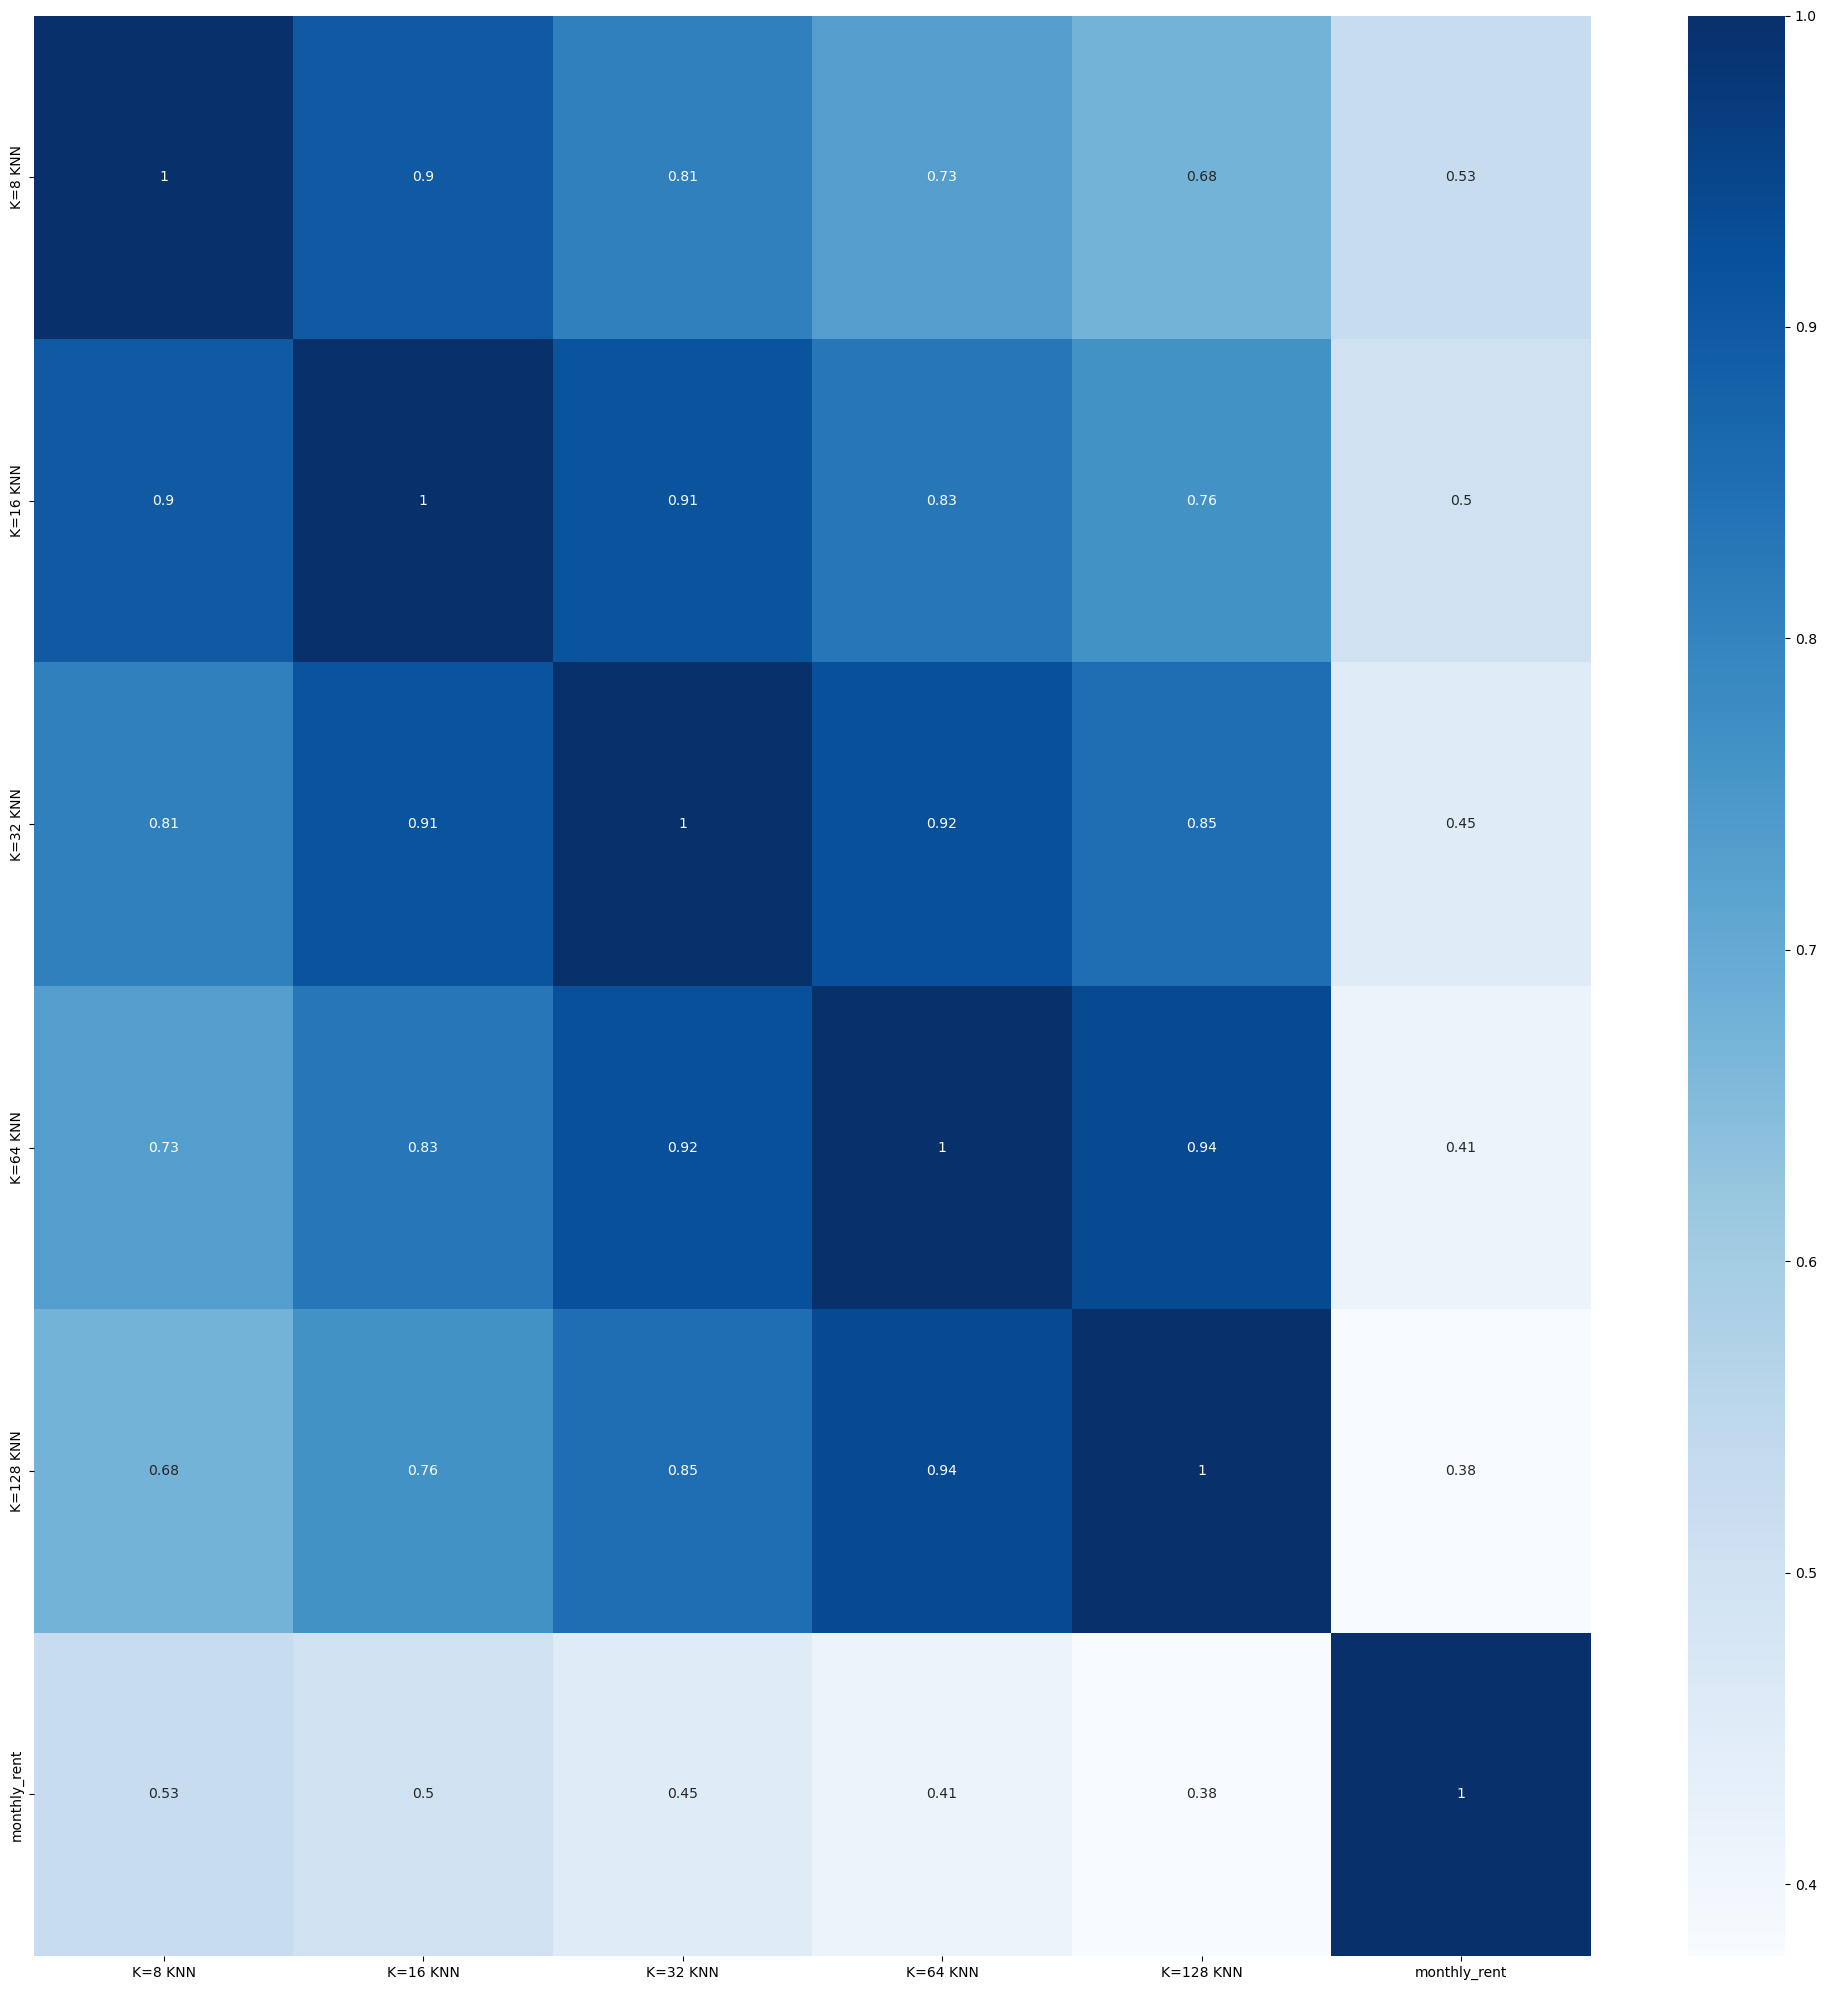

In [16]:
plt.figure(figsize=(20, 20))
corr = df_train_map_mean_KNN[['K=8 KNN', 'K=16 KNN', 'K=32 KNN', 'K=64 KNN', 'K=128 KNN', 'monthly_rent']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.tight_layout()
df_train_map_mean_KNN.columns

## try with attributes with KNN_feature
* block
* street_name
* flat_type
* floor_area_sqm
* subzone
* rent_approval_date_mean
* KNN_feature
* price
## with method
* xgboost
* lgbm

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [50]:
def data_preprocess(df, df_train_):
    df = df.copy()

    df['flat_type'] = df['flat_type'].str.replace('-', ' ')
    df = category_map_mean(df, df_train_)
    df.drop(['elevation'], axis=1, inplace=True)
    df.drop(['furnished'], axis=1, inplace=True)
    for K in [8, 16, 32, 64, 128, 256]:
        df = add_KNN_feature(df, df_train_, K)
    df.drop(['latitude'], axis=1, inplace=True)
    df.drop(['longitude'], axis=1, inplace=True)
    df['rent_date'] = pd.to_datetime(df['rent_approval_date']).dt.year + pd.to_datetime(df['rent_approval_date']).dt.month/12
    df.drop(['rent_approval_date'], axis=1, inplace=True)

    return df

In [51]:
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [52]:
df_train

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2021-09,ang mo kio,441,Ang Mo Kio Avenue 10,3 room,new generation,67.0,yes,1979,1.366050,103.854168,0.0,chong boon,ang mo kio,north-east region,2200
59996,2023-04,bukit merah,95a,henderson road,4-room,model a,83.0,yes,2019,1.286493,103.821434,0.0,henderson hill,bukit merah,central region,4100
59997,2022-06,tampines,862a,tampines street 83,5-room,improved,122.0,yes,1988,1.355064,103.936507,0.0,tampines west,tampines,east region,2250
59998,2023-01,bedok,67,Bedok Sth Avenue 3,5-room,standard,123.0,yes,1977,1.318974,103.944076,0.0,bedok south,bedok,east region,4700


In [53]:
#split by year
df_train_years =[]
df_train['rent_approval_date'] = pd.to_datetime(df_train['rent_approval_date'])
for year in [2021, 2022, 2023]:
    df_train_years.append(df_train[df_train['rent_approval_date'].dt.year == year])

df_train_years[2]

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
5,2023-04-01,bukit panjang,654,Senja Road,executive,premium apartment,130.0,yes,2001,1.387847,103.764249,0.0,saujana,bukit panjang,west region,2300
14,2023-04-01,sengkang,416a,Fernvale Link,4-room,model a,93.0,yes,2016,1.390612,103.879964,0.0,fernvale,sengkang,north-east region,3150
17,2023-01-01,pasir ris,524c,Pasir Ris Street 51,5-room,improved,113.0,yes,2015,1.370545,103.947595,0.0,pasir ris central,pasir ris,east region,4400
22,2023-07-01,queenstown,81,commonwealth close,3-room,standard,60.0,yes,1967,1.303787,103.800385,0.0,commonwealth,queenstown,central region,2750
28,2023-05-01,ang mo kio,313,Ang Mo Kio Avenue 3,4-room,new generation,97.0,yes,1978,1.366650,103.850134,0.0,townsville,ang mo kio,north-east region,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59993,2023-05-01,choa chu kang,676,Choa Chu Kang Crescent,5-room,premium apartment,124.0,yes,1999,1.401916,103.746188,0.0,yew tee,choa chu kang,west region,4100
59994,2023-02-01,geylang,63,sims place,3-room,model a,68.0,yes,2016,1.316595,103.879546,0.0,aljunied,geylang,central region,2950
59996,2023-04-01,bukit merah,95a,henderson road,4-room,model a,83.0,yes,2019,1.286493,103.821434,0.0,henderson hill,bukit merah,central region,4100
59998,2023-01-01,bedok,67,Bedok Sth Avenue 3,5-room,standard,123.0,yes,1977,1.318974,103.944076,0.0,bedok south,bedok,east region,4700


In [54]:
df_train_years_preprocess = []
for df in df_train_years:
    df_train_years_preprocess.append(data_preprocess(df, df))



C:\Users\Concyclics\AppData\Local\Temp\ipykernel_29040\732443312.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KNN_X['latitude'] *= 2
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_29040\732443312.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_X['latitude'] *= 2
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_29040\732443312.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [55]:
df_train_years_preprocess[0]

,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,subzone,planning_area,region,monthly_rent,rent_approval_date_mean,K=8 KNN,K=16 KNN,K=32 KNN,K=64 KNN,K=128 KNN,K=256 KNN,rent_date
0,2235.220994,2182.000000,1938.636364,1974.144364,2065.156082,67.0,1983,2176.122449,2235.220994,2213.963435,1600,2233.926780,1793.75,1890.625,1956.2500,1959.37500,1969.921875,2076.171875,2021.750000
3,2307.898260,2146.428571,2323.913043,2476.636423,2478.877005,149.0,1993,2280.248619,2307.898260,2218.417769,2850,2249.901768,2562.50,2518.750,2414.0625,2322.65625,2288.281250,2268.750000,2021.666667
6,2197.699476,2168.750000,2084.375000,2400.673617,2276.552211,110.0,2005,2143.478261,2197.699476,2172.737955,2100,2152.142513,2168.75,2178.125,2154.6875,2139.84375,2141.796875,2134.765625,2021.083333
8,2489.572650,2457.352941,2376.666667,2302.270969,2121.109200,84.0,1987,2525.420168,2489.572650,2368.314763,2100,2261.516035,2606.25,2346.875,2404.6875,2450.00000,2417.578125,2426.953125,2021.833333
9,2191.697417,2213.888889,2186.021505,2400.673617,2276.552211,112.0,2003,2169.711538,2191.697417,2172.737955,2100,2182.674772,2081.25,2125.000,2167.1875,2138.28125,2154.296875,2155.273438,2021.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59987,2249.424957,2687.500000,2235.526316,2476.636423,2478.877005,147.0,1995,2194.800885,2249.424957,2218.417769,2550,2249.901768,2643.75,2668.750,2329.6875,2270.31250,2258.203125,2251.562500,2021.666667
59988,2249.424957,2050.000000,2035.000000,2302.270969,2237.606777,104.0,1988,2194.800885,2249.424957,2218.417769,2050,2167.458384,2125.00,2103.125,2131.2500,2114.84375,2122.265625,2196.093750,2021.250000
59990,2249.424957,2252.816901,2379.569892,2400.673617,2272.618212,123.0,1988,2417.193676,2249.424957,2218.417769,2500,2167.458384,2575.00,2518.750,2509.3750,2485.93750,2469.140625,2366.601562,2021.250000
59991,2191.697417,2350.000000,2165.333333,2302.270969,2276.552211,93.0,2010,2357.042254,2191.697417,2172.737955,2800,2223.939114,2550.00,2306.250,2285.9375,2256.25000,2212.109375,2251.367188,2021.500000


In [56]:
#split test by year
df_test_years =[]
df_test['rent_approval_date'] = pd.to_datetime(df_test['rent_approval_date'])
for year in [2021, 2022, 2023]:
    df_test_years.append(df_test[df_test['rent_approval_date'].dt.year == year])
    
df_test_years_preprocess = []
for i in range(len(df_test_years)):
    df_test_years_preprocess.append(data_preprocess(df_test_years[i], df_train_years[i]))
    

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_29040\732443312.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KNN_X['latitude'] *= 2
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_29040\732443312.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_X['latitude'] *= 2
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_29040\732443312.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [57]:
df_test_years_preprocess[0]

,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,subzone,planning_area,region,rent_approval_date_mean,K=8 KNN,K=16 KNN,K=32 KNN,K=64 KNN,K=128 KNN,K=256 KNN,rent_date
3,2235.220994,2188.709677,2472.727273,1974.144364,2237.606777,74.0,1986,2118.666667,2235.220994,2213.963435,2249.901768,2068.75,2043.750,2062.5000,2057.03125,2119.140625,2092.187500,2021.666667
6,2191.697417,2160.714286,2139.285714,2400.673617,2276.552211,110.0,2005,2150.395257,2191.697417,2172.737955,2216.537301,2025.00,2134.375,2134.3750,2113.28125,2123.437500,2132.031250,2021.416667
8,2288.358779,2315.909091,2650.000000,2476.636423,2276.552211,133.0,2001,2469.604613,2288.358779,2213.963435,2339.852217,2468.75,2493.750,2553.1250,2588.28125,2524.218750,2513.867188,2022.000000
10,2126.205288,2012.500000,2228.125000,2302.270969,2237.606777,102.0,1997,2153.669725,2126.205288,2101.373881,2223.939114,2181.25,2203.125,2195.3125,2237.50000,2214.453125,2191.992188,2021.500000
14,2139.020381,2180.000000,2368.333333,2302.270969,2065.156082,92.0,1980,2068.141593,2139.020381,2218.417769,2223.939114,2262.50,2200.000,2145.3125,2100.78125,2076.562500,2078.515625,2021.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29979,2139.020381,2130.357143,2274.242424,2302.270969,2272.618212,84.0,1977,2140.669014,2139.020381,2218.417769,2216.537301,2162.50,2156.250,2128.1250,2109.37500,2142.968750,2129.492188,2021.416667
29986,2288.358779,2250.000000,2443.750000,2302.270969,2237.606777,91.0,2000,2469.604613,2288.358779,2213.963435,2289.098532,2550.00,2556.250,2575.0000,2570.31250,2549.609375,2510.742188,2021.916667
29987,2145.060659,2340.000000,2082.142857,2302.270969,2065.156082,91.0,1986,2124.444444,2145.060659,2172.737955,2167.458384,2118.75,2181.250,2234.3750,2245.31250,2312.500000,2254.296875,2021.250000
29990,2335.780423,2950.000000,2623.076923,2302.270969,2237.606777,95.0,2005,2383.128834,2375.239006,2368.314763,2146.756152,2906.25,2665.625,2579.6875,2502.34375,2375.390625,2270.898438,2021.166667


In [58]:
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [63]:
#tuning parameters split by year with grid search
from sklearn.model_selection import GridSearchCV

models = []
params = []

n_estimators = [100, 150, 200, 250, 300, 400, 500, 600, 700, 800]
learning_rate = [0.01, 0.015, 0.02, 0.025, 0.03, 0.04]

for i in range(3):
    X_train = df_train_years_preprocess[i].drop(['monthly_rent'], axis=1)
    y_train = df_train_years_preprocess[i]['monthly_rent']
    print('year:', i+2021, 'start')

    model = LGBMRegressor()
    param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1, cv=2)

    grid_result = grid.fit(X_train, y_train)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)

    models.append(grid_result.best_estimator_)
    params.append(grid_result.best_params_)
    print('year:', i+2021, 'end')


    
    



year: 2021 start


InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'neg_mean_squared_log_error', 'jaccard_micro', 'roc_auc_ovo', 'neg_mean_gamma_deviance', 'recall_samples', 'recall_weighted', 'neg_mean_absolute_error', 'f1_macro', 'neg_mean_absolute_percentage_error', 'precision_macro', 'f1', 'neg_brier_score', 'precision_weighted', 'matthews_corrcoef', 'f1_micro', 'jaccard_weighted', 'neg_negative_likelihood_ratio', 'explained_variance', 'jaccard', 'precision_samples', 'neg_mean_poisson_deviance', 'homogeneity_score', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score', 'r2', 'roc_auc_ovo_weighted', 'f1_weighted', 'precision_micro', 'jaccard_samples', 'neg_root_mean_squared_error', 'recall_micro', 'adjusted_mutual_info_score', 'neg_mean_squared_error', 'top_k_accuracy', 'fowlkes_mallows_score', 'neg_median_absolute_error', 'rand_score', 'recall', 'positive_likelihood_ratio', 'roc_auc', 'adjusted_rand_score', 'f1_samples', 'completeness_score', 'accuracy', 'mutual_info_score', 'max_error', 'normalized_mutual_info_score', 'balanced_accuracy', 'precision', 'recall_macro', 'average_precision', 'neg_log_loss', 'jaccard_macro'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got 'root_mean_squared_error' instead.

In [ ]:
#cut 30% data as validation set
X_train, X_val, y_train, y_val = train_test_split(df_train_X, df_train_y, test_size=0.3, random_state=19260817)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1182
[LightGBM] [Info] Number of data points in the train set: 42000, number of used features: 10
[LightGBM] [Info] Start training from score 2586.378571
LGBM MAE:  362.2496009382918
LGBM RMSE:  473.8726676024341


<Axes: >

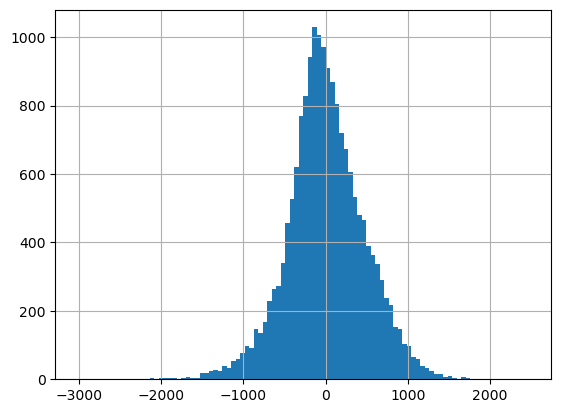

In [ ]:
LGBM = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=500,
)

LGBM.fit(X_train, y_train)
y_pred = LGBM.predict(X_val)
print('LGBM MAE: ', mean_absolute_error(y_val, y_pred))
print('LGBM RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)



C:\Users\Concyclics\AppData\Local\Temp\ipykernel_42340\3547464200.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val, hist=False, label='y_val')
C:\Users\Concyclics\AppData\Local\Temp\ipykernel_42340\3547464200.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, 

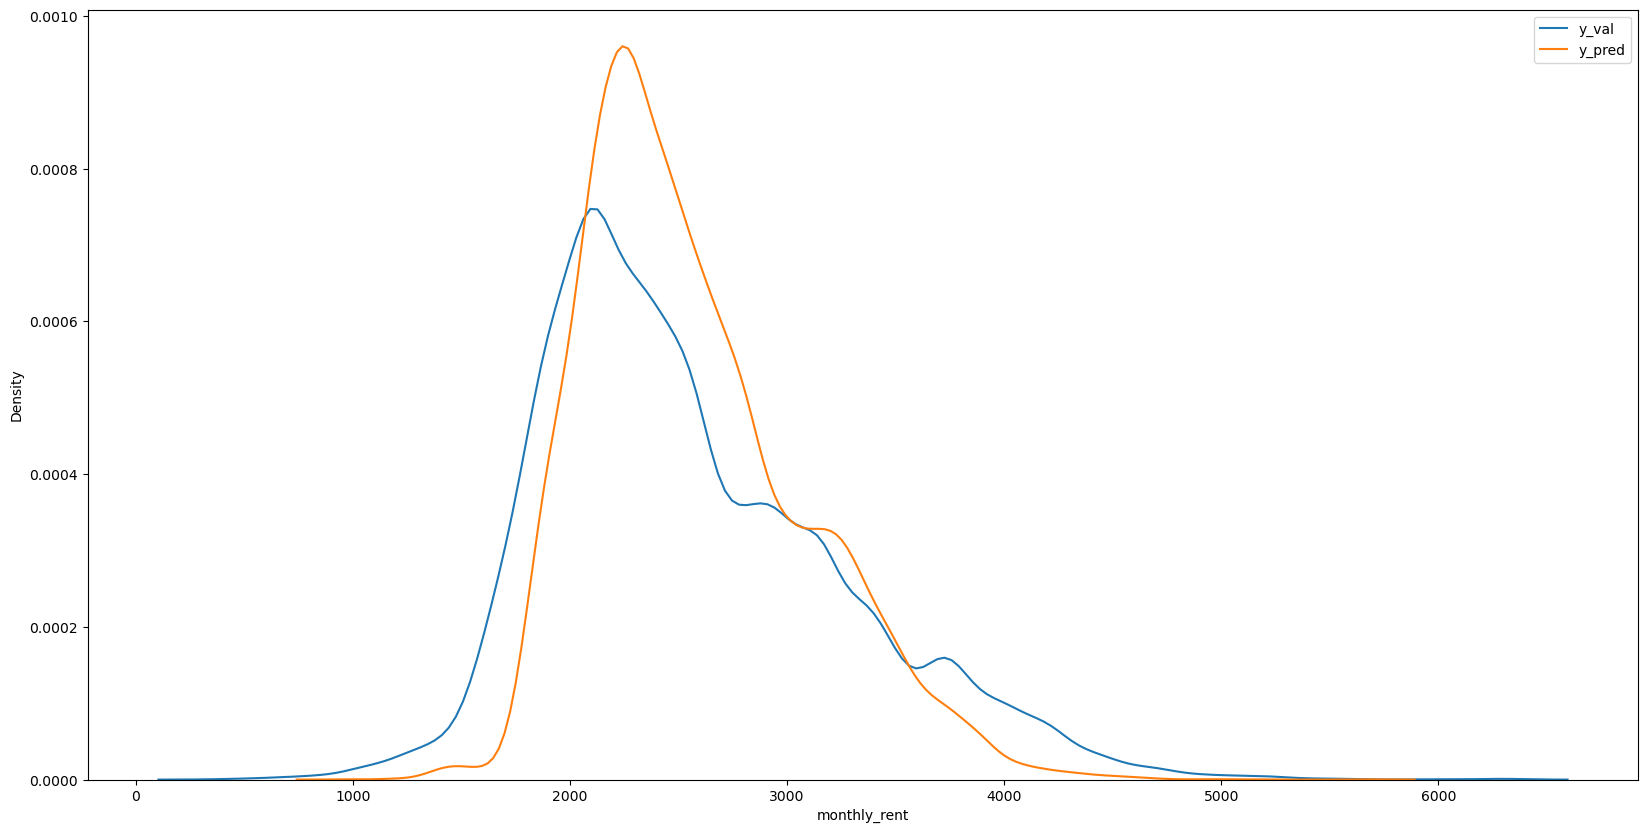

In [ ]:
#plot distribution from predcit and real
plt.figure(figsize=(20, 10))
sns.distplot(y_val, hist=False, label='y_val')
sns.distplot(y_pred, hist=False, label='y_pred')
plt.legend()
plt.show()

In [ ]:
#submit with LGBM
LGBM = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=500,
)

LGBM.fit(df_train_X, df_train_y)

submission = pd.read_csv(path_prefix + 'example-submission.csv')
submission['Predicted'] = LGBM.predict(df_test_X)

submission.to_csv('submission.csv', index=False)



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 10
[LightGBM] [Info] Start training from score 2590.328333


In [ ]:
#feature importance
lgb_model = LGBMRegressor()
features = X_train.columns
dict_feature_importance = {}

lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_val)

original_rmse = mean_squared_error(y_val, y_pred, squared=False)

for feature in features:
    X_train_tmp = X_train.drop([feature], axis=1)
    X_val_tmp = X_val.drop([feature], axis=1)
    lgb_model.fit(X_train_tmp, y_train)
    y_pred = lgb_model.predict(X_val_tmp)
    dict_feature_importance[feature] = mean_squared_error(y_val, y_pred, squared=False) - original_rmse


In [ ]:
for feature in features:
    print(feature, '\t\t', dict_feature_importance[feature])

block 		 6.781290413628653
street_name 		 3.2325207099596582
flat_type 		 0.8867685255146398
floor_area_sqm 		 0.10900175724748351
subzone 		 4.340516944205319
rent_approval_date_mean 		 -0.10558833569683657
adjusted_close 		 -0.4333536304993686
price 		 -0.13245692856355618


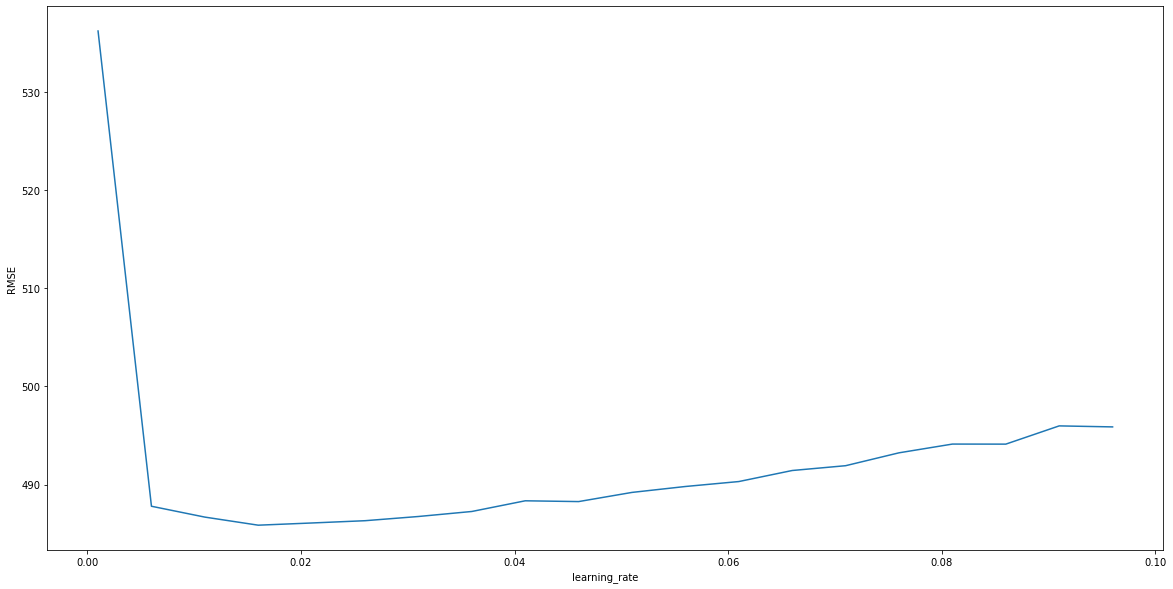

In [ ]:
#tuning with different learning rate
learning_rate_list = list(np.arange(0.001, 0.1, 0.005))
LGBM_RMSE_list = []
for learning_rate in learning_rate_list:
    LGBM = LGBMRegressor(
        learning_rate=learning_rate,
        n_estimators=1000,
    )

    LGBM.fit(X_train, y_train)
    y_pred = LGBM.predict(X_val)
    LGBM_RMSE_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.figure(figsize=(20, 10))
plt.plot(learning_rate_list, LGBM_RMSE_list)
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.show()